In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/onlinenewspopularity/OnlineNewsPopularity.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [3]:
news = pd.read_csv('../input/onlinenewspopularity/OnlineNewsPopularity.csv')

In [4]:
news.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [5]:
news.shape

(39644, 61)

In [6]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [7]:
#Calculate the average of each column
news.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [8]:
news.values

array([['http://mashable.com/2013/01/07/amazon-instant-video-browser/',
        731.0, 12.0, ..., 0.0, 0.1875, 593],
       ['http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/',
        731.0, 9.0, ..., 0.5, 0.0, 711],
       ['http://mashable.com/2013/01/07/apple-40-billion-app-downloads/',
        731.0, 9.0, ..., 0.5, 0.0, 1500],
       ...,
       ['http://mashable.com/2014/12/27/son-pays-off-mortgage/', 8.0,
        10.0, ..., 0.0454545454545, 0.136363636364, 1900],
       ['http://mashable.com/2014/12/27/ukraine-blasts/', 8.0, 6.0, ...,
        0.5, 0.0, 1100],
       ['http://mashable.com/2014/12/27/youtube-channels-2015/', 8.0,
        10.0, ..., 0.166666666667, 0.25, 1300]], dtype=object)

In [9]:
news1 = news[news[' shares']>3395]
news1

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
8,http://mashable.com/2013/01/07/car-of-the-futu...,731.0,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,...,0.400000,0.8,-0.125000,-0.125000,-0.125,0.125000,0.000000,0.375000,0.000000,3600
13,http://mashable.com/2013/01/07/dad-jokes/,731.0,9.0,285.0,0.744186,1.0,0.841530,4.0,2.0,0.0,...,0.160000,1.0,-0.337889,-0.700000,-0.100,1.000000,-1.000000,0.500000,1.000000,10000
16,http://mashable.com/2013/01/07/echo-game/,731.0,8.0,1118.0,0.512397,1.0,0.709770,26.0,18.0,12.0,...,0.100000,1.0,-0.401437,-1.000000,-0.050,0.566667,-0.100000,0.066667,0.100000,13600
18,http://mashable.com/2013/01/07/facebook-sick-app/,731.0,11.0,103.0,0.689320,1.0,0.806452,3.0,1.0,1.0,...,0.033333,0.5,-0.125000,-0.125000,-0.125,0.857143,-0.714286,0.357143,0.714286,5700
19,http://mashable.com/2013/01/07/felt-audio-puls...,731.0,8.0,1207.0,0.410579,1.0,0.548969,24.0,24.0,42.0,...,0.100000,1.0,-0.226786,-0.500000,-0.050,0.500000,0.000000,0.000000,0.000000,17100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39598,http://mashable.com/2014/12/26/holiday-decorat...,9.0,11.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000,0.333333,0.250000,0.166667,0.250000,6100
39603,http://mashable.com/2014/12/26/north-korea-bla...,9.0,15.0,426.0,0.540284,1.0,0.693227,5.0,1.0,1.0,...,0.100000,0.8,-0.235049,-0.500000,-0.050,0.450000,0.250000,0.050000,0.250000,4600
39611,http://mashable.com/2014/12/26/sony-playstatio...,9.0,12.0,270.0,0.604651,1.0,0.670213,13.0,1.0,1.0,...,0.366667,0.5,-0.120139,-0.155556,-0.100,0.000000,0.000000,0.500000,0.000000,4600
39615,http://mashable.com/2014/12/26/toothpaste-fluo...,9.0,11.0,0.0,0.000000,0.0,0.000000,0.0,0.0,21.0,...,0.000000,0.0,0.000000,0.000000,0.000,0.454545,0.136364,0.045455,0.136364,5700


In [10]:
news1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8079 entries, 8 to 39621
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             8079 non-null   object 
 1    timedelta                      8079 non-null   float64
 2    n_tokens_title                 8079 non-null   float64
 3    n_tokens_content               8079 non-null   float64
 4    n_unique_tokens                8079 non-null   float64
 5    n_non_stop_words               8079 non-null   float64
 6    n_non_stop_unique_tokens       8079 non-null   float64
 7    num_hrefs                      8079 non-null   float64
 8    num_self_hrefs                 8079 non-null   float64
 9    num_imgs                       8079 non-null   float64
 10   num_videos                     8079 non-null   float64
 11   average_token_length           8079 non-null   float64
 12   num_keywords                   8

In [11]:
news1 = news1.drop(columns=[' timedelta',' n_non_stop_words',' n_non_stop_unique_tokens',' num_keywords',' max_negative_polarity',' min_negative_polarity',' avg_negative_polarity',' global_sentiment_polarity',' LDA_00', ' LDA_01',' LDA_02',' LDA_03',' LDA_04',' num_self_hrefs',' avg_positive_polarity',' min_positive_polarity',' max_positive_polarity',' weekday_is_tuesday',' weekday_is_wednesday',' weekday_is_thursday',' weekday_is_friday',' weekday_is_saturday',' weekday_is_sunday',' data_channel_is_lifestyle',' data_channel_is_entertainment',' data_channel_is_bus',' data_channel_is_socmed',' data_channel_is_tech',' data_channel_is_world',' self_reference_min_shares',' self_reference_max_shares',' self_reference_avg_sharess',' kw_min_min',' kw_max_min',' kw_avg_min',' kw_min_max',' kw_max_max',' kw_avg_max',' kw_min_avg',' kw_max_avg',' kw_avg_avg'])

In [12]:
news1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8079 entries, 8 to 39621
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            8079 non-null   object 
 1    n_tokens_title                8079 non-null   float64
 2    n_tokens_content              8079 non-null   float64
 3    n_unique_tokens               8079 non-null   float64
 4    num_hrefs                     8079 non-null   float64
 5    num_imgs                      8079 non-null   float64
 6    num_videos                    8079 non-null   float64
 7    average_token_length          8079 non-null   float64
 8    weekday_is_monday             8079 non-null   float64
 9    is_weekend                    8079 non-null   float64
 10   global_subjectivity           8079 non-null   float64
 11   global_rate_positive_words    8079 non-null   float64
 12   global_rate_negative_words    8079 non-null   

In [13]:
news1.shape

(8079, 20)

In [14]:
#droping url
news1.drop(columns=['url'],inplace=True)

<AxesSubplot:>

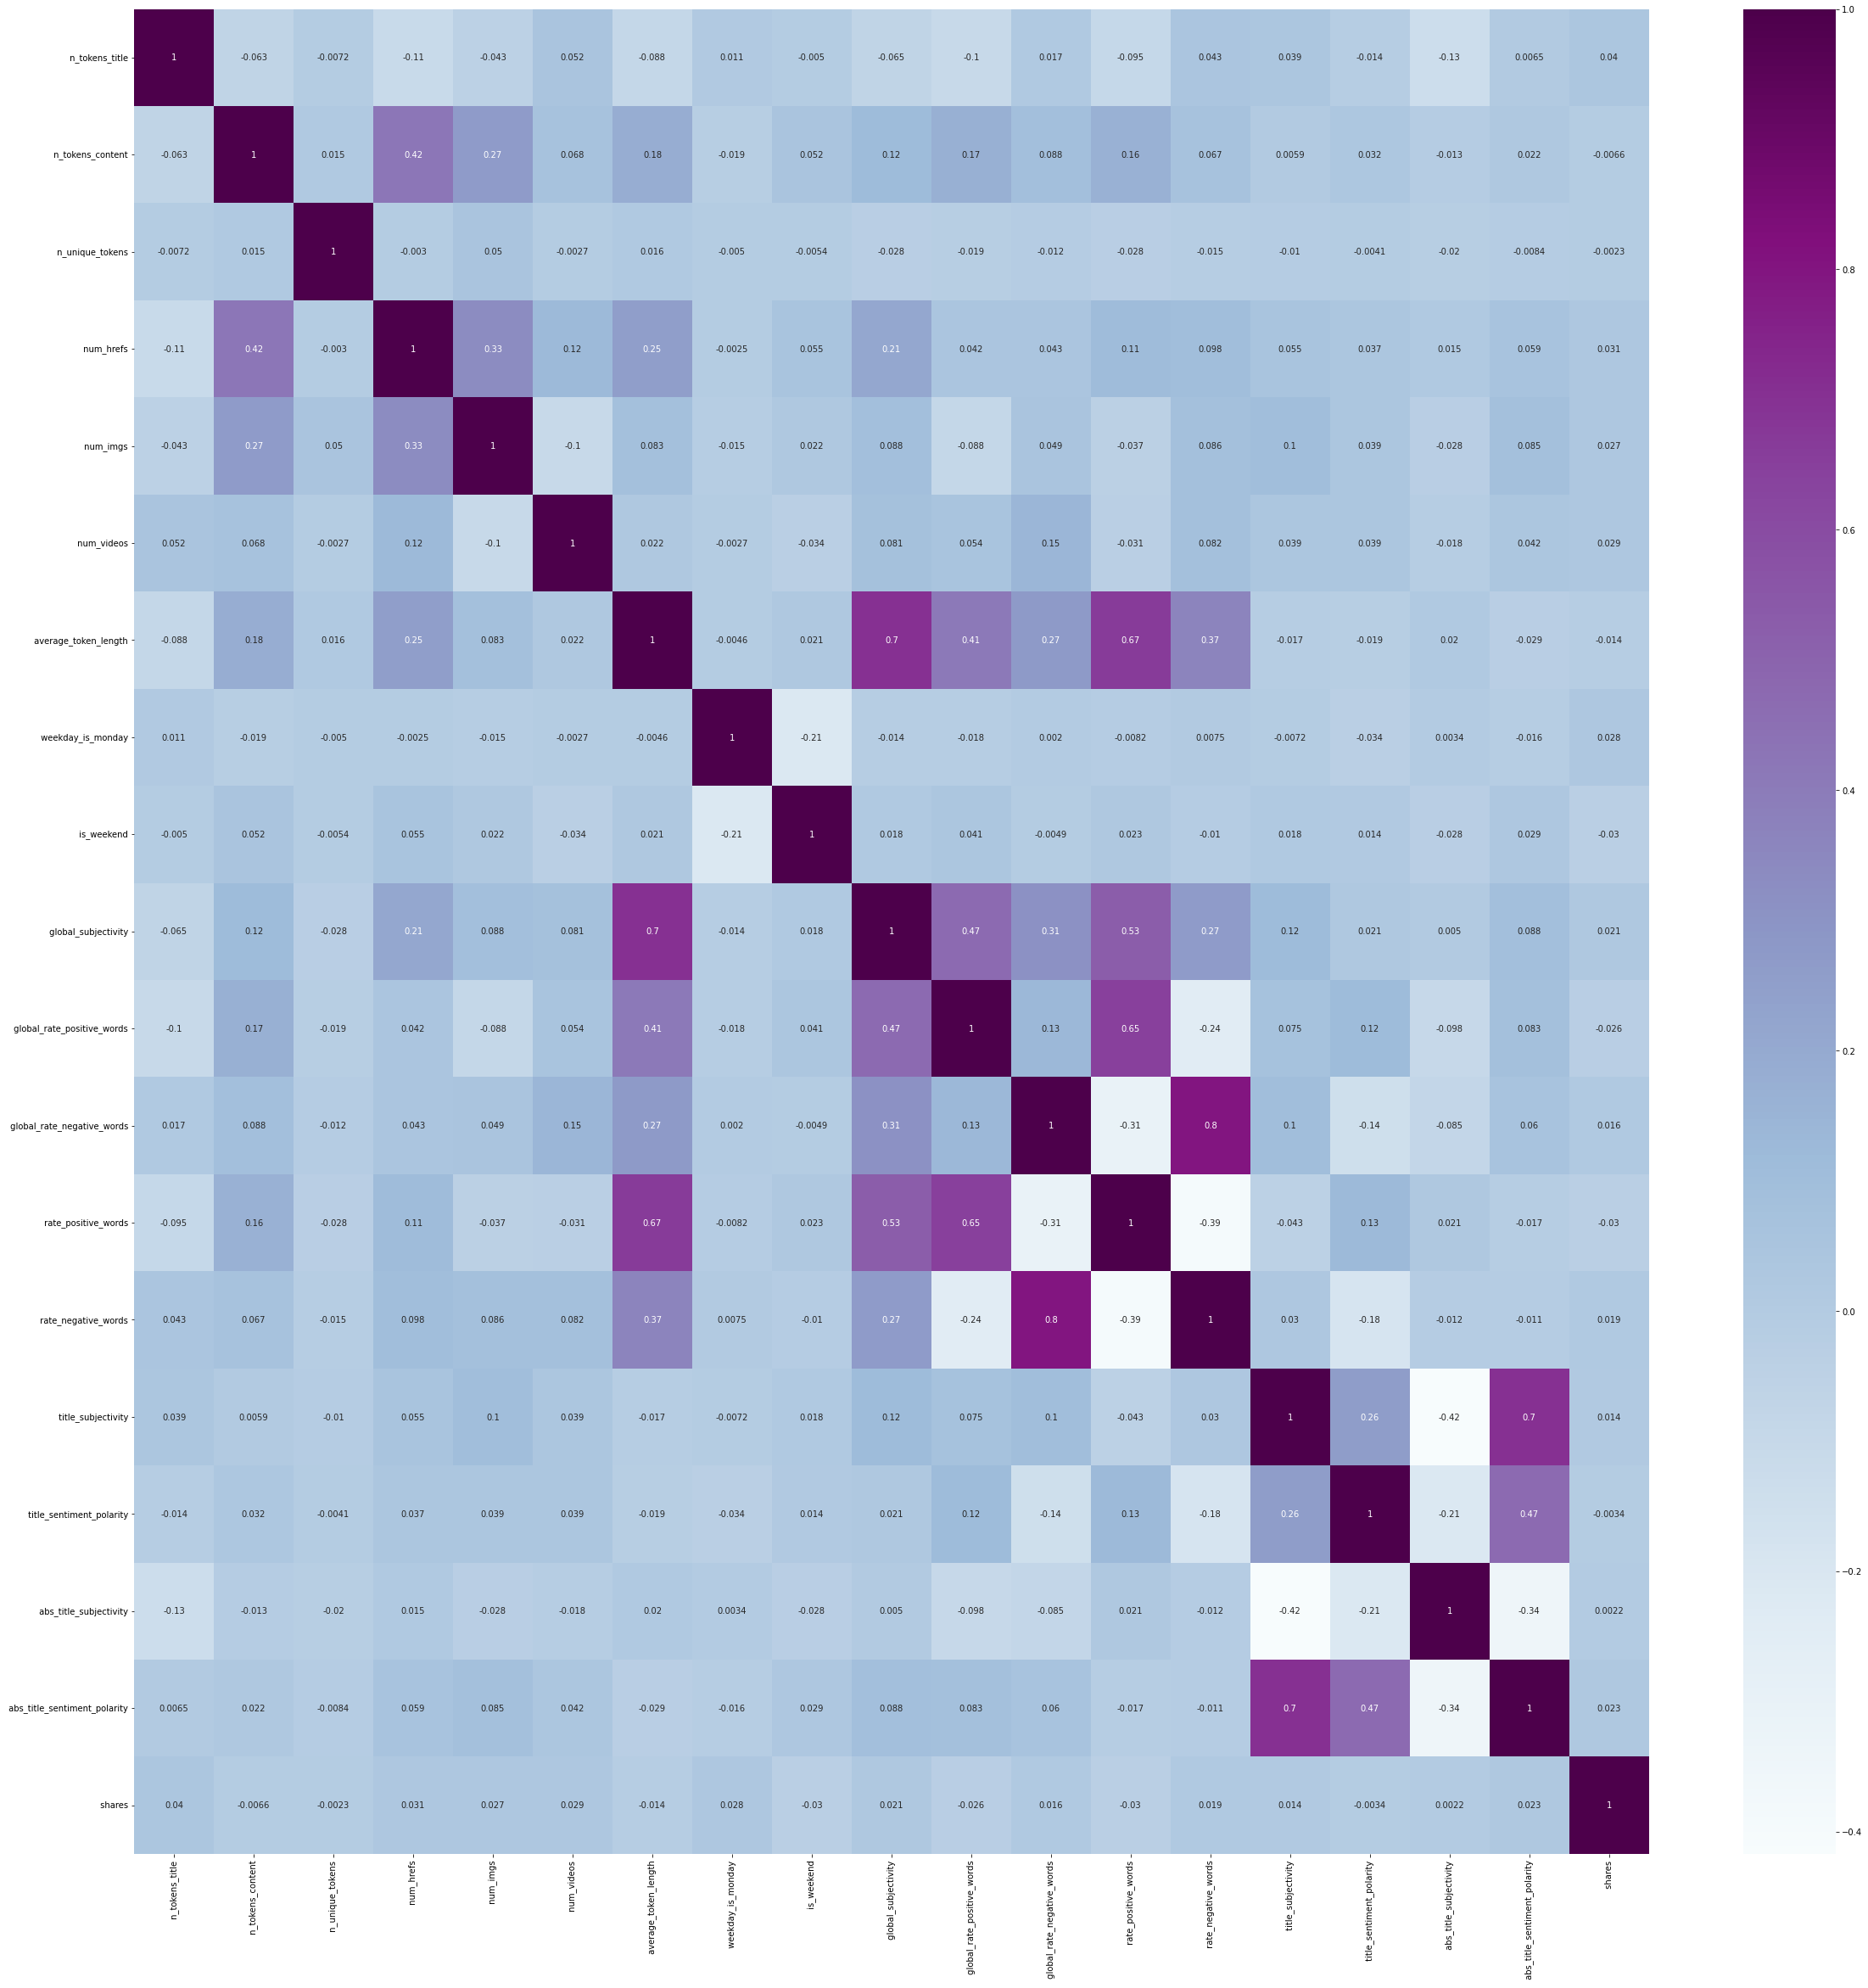

In [15]:
#correlation plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(40,40))
sns.heatmap(data=news1.corr(),annot=True,cmap='BuPu')

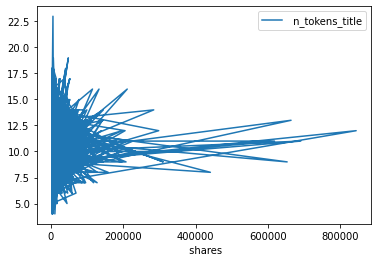

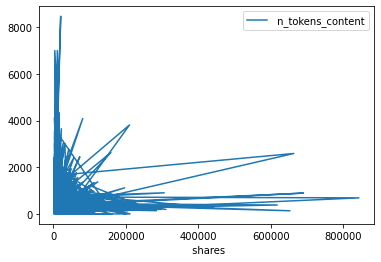

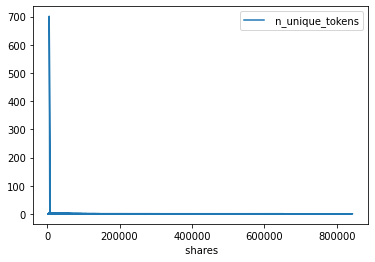

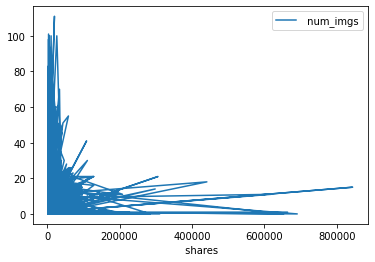

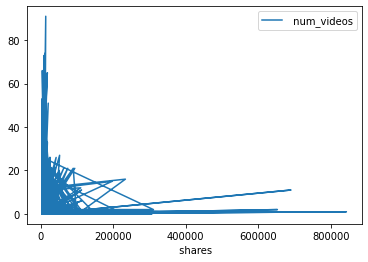

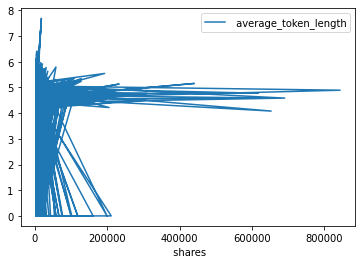

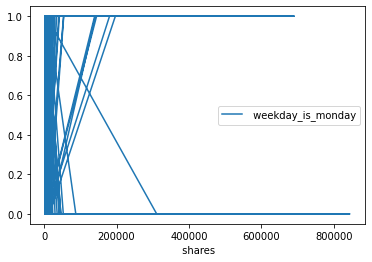

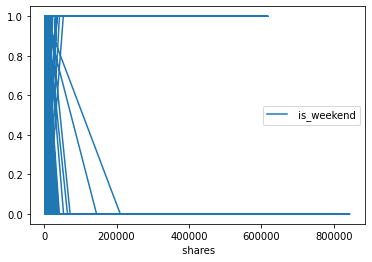

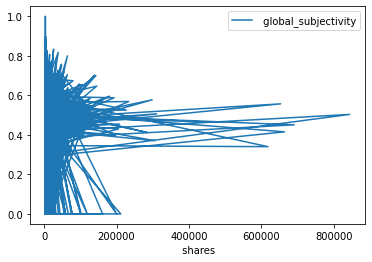

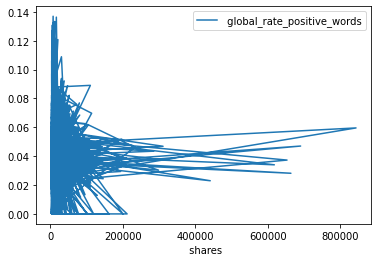

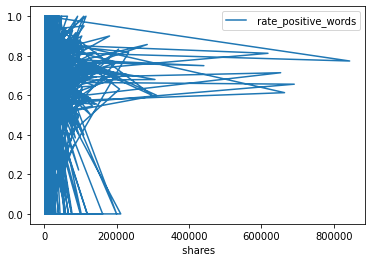

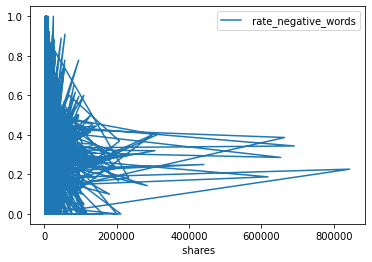

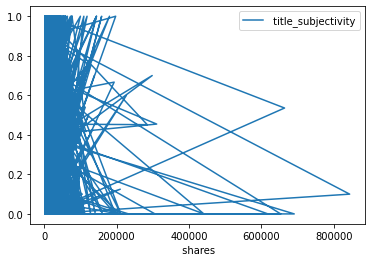

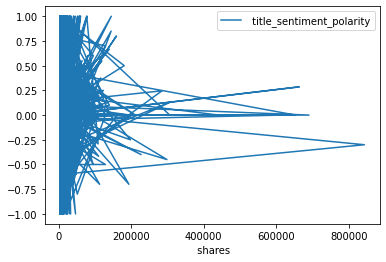

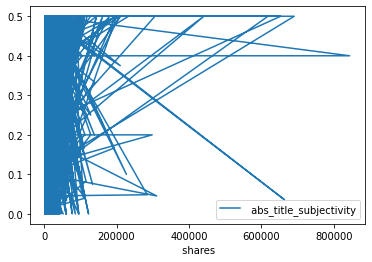

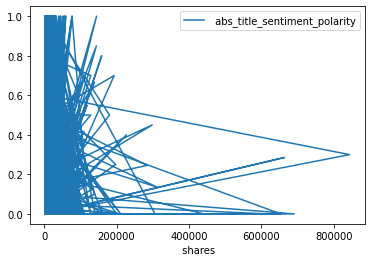

In [16]:
lines = news1.plot.line(x= ' shares', y= ' n_tokens_title')
lines = news1.plot.line(x= ' shares', y= ' n_tokens_content')
lines = news1.plot.line(x= ' shares', y= ' n_unique_tokens')
lines = news1.plot.line(x= ' shares', y= ' num_imgs')
lines = news1.plot.line(x= ' shares', y= ' num_videos')
lines = news1.plot.line(x= ' shares', y= ' average_token_length')
lines = news1.plot.line(x= ' shares', y= ' weekday_is_monday')
lines = news1.plot.line(x= ' shares', y= ' is_weekend')
lines = news1.plot.line(x= ' shares', y= ' global_subjectivity')
lines = news1.plot.line(x= ' shares', y= ' global_rate_positive_words')
lines = news1.plot.line(x= ' shares', y= ' rate_positive_words')
lines = news1.plot.line(x= ' shares', y= ' rate_negative_words')
lines = news1.plot.line(x= ' shares', y= ' title_subjectivity')
lines = news1.plot.line(x= ' shares', y= ' title_sentiment_polarity')
lines = news1.plot.line(x= ' shares', y= ' abs_title_subjectivity')
lines = news1.plot.line(x= ' shares', y= ' abs_title_sentiment_polarity')


<AxesSubplot:xlabel=' shares', ylabel=' abs_title_sentiment_polarity'>

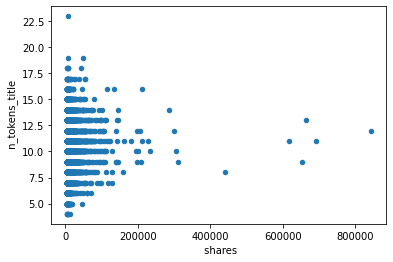

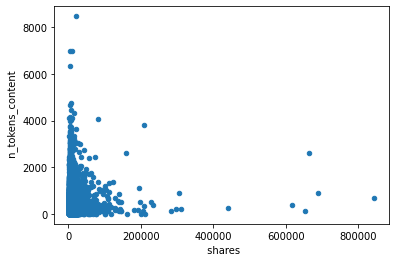

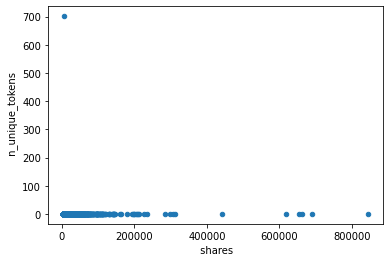

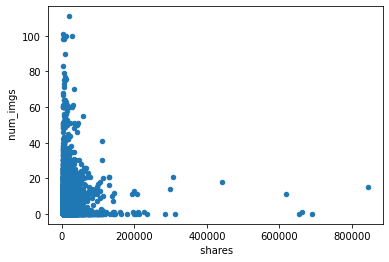

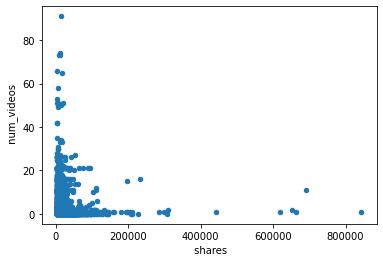

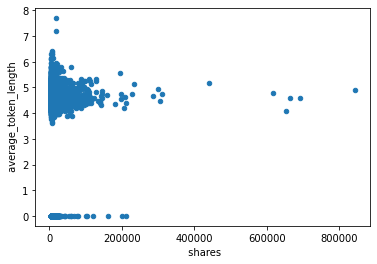

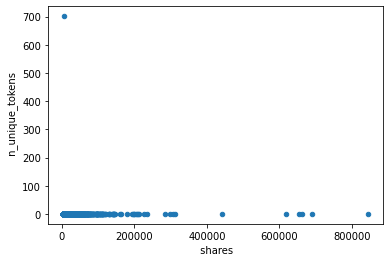

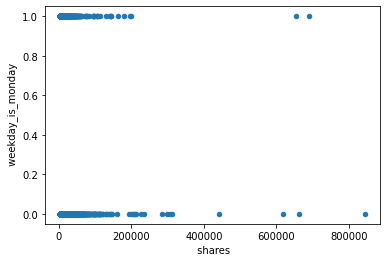

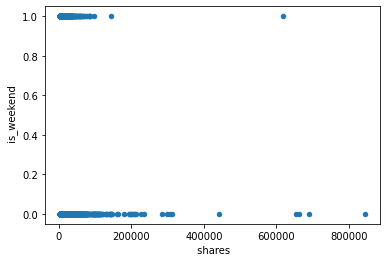

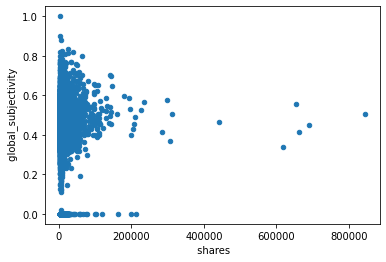

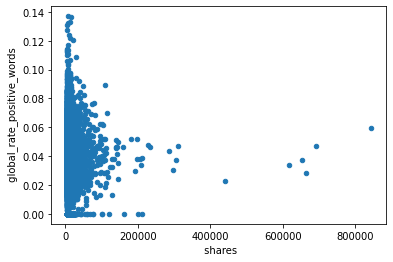

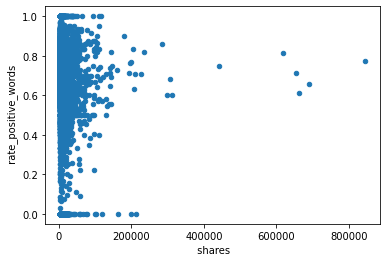

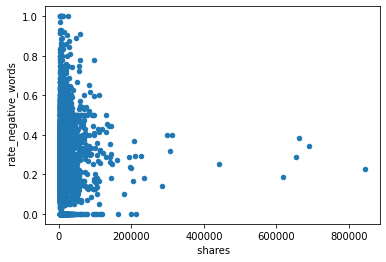

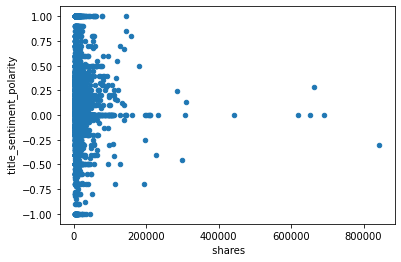

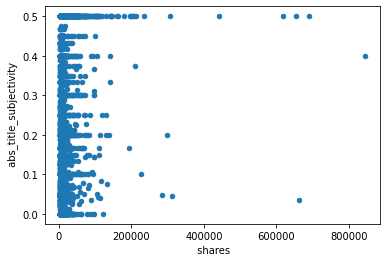

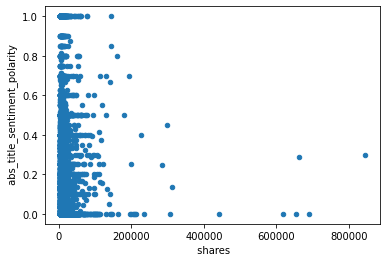

In [17]:
news1.plot(x=" shares", y=" n_tokens_title", kind="scatter")
news1.plot(x=" shares", y=" n_tokens_content", kind="scatter")
news1.plot(x=" shares", y=" n_unique_tokens", kind="scatter")
news1.plot(x=" shares", y=" num_imgs", kind="scatter")
news1.plot(x=" shares", y=" num_videos", kind="scatter")
news1.plot(x=" shares", y=" average_token_length", kind="scatter")
news1.plot(x=" shares", y=" n_unique_tokens", kind="scatter")
news1.plot(x=" shares", y=" weekday_is_monday", kind="scatter")
news1.plot(x=" shares", y=" is_weekend", kind="scatter")
news1.plot(x=" shares", y=" global_subjectivity", kind="scatter")
news1.plot(x=" shares", y=" global_rate_positive_words", kind="scatter")
news1.plot(x=" shares", y=" rate_positive_words", kind="scatter")
news1.plot(x=" shares", y=" rate_negative_words", kind="scatter")
news1.plot(x=" shares", y=" title_sentiment_polarity", kind="scatter")
news1.plot(x=" shares", y=" abs_title_subjectivity", kind="scatter")
news1.plot(x=" shares", y=" abs_title_sentiment_polarity", kind="scatter")

KeyError: ' n_tokens_title'

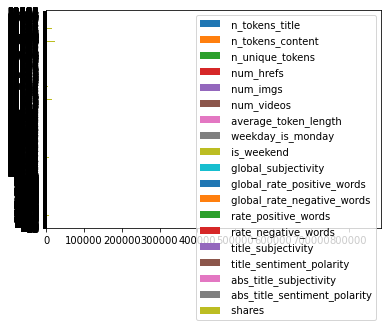

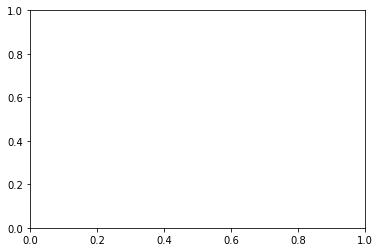

In [18]:
ax = news1.plot.barh()
ax = news1.plot.barh(color={" rate_positive_words": "red", " rate_negative_words": "green"})